<center><img width="460" height="300" src="https://upload.wikimedia.org/wikipedia/en/thumb/7/70/KAUST_Logo.svg/1200px-KAUST_Logo.svg.png"></center>
<h2><center>$$King~Abduallah~University~for~Science~and~Technology$$</center></h2>
<h2><center>$$\underline{\textbf{Course}}:~\color{Gold}{Geo-Environmental~Modeling}~\color{orange}{and}~\color{Turquoise}{Analysis}~(ErSE~316)$$</center></h2>
<h2><center>$$\underline{\textbf{Instructors:}}~\textbf{Hylke Beck} ~ \textbf{and} ~ \textbf{Yoshihide Wada} ~$$</center></h2>
<h2><center>$$\underline{\textbf{Student:}}~Sofien~Resifi$$</center></h2>
<h3><center>$$\underline{\textbf{Assignment 6}}$$</center></h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pdb
import xarray as xr
import warnings
from netCDF4 import Dataset
import cdsapi
from tqdm import tqdm
import geopandas as gpd
import rioxarray
import seaborn as sns
warnings.filterwarnings("ignore")

# Part 1: Data Download

I have used the data from the provided folders

In [3]:
# All dataset are read and append to a list for each variable.
list_evap = []
list_prep = []
list_runoff = []
for year in tqdm(range(2000,2021)):
    path_evap = f"Total_Evaporation/era5_OLR_{year}_total_evaporation.nc"
    path_prep =  f"Precipitation/era5_OLR_{year}_total_precipitation.nc"
    path_runoff = f"Runoff/ambientera5_OLR_{year}_total_runoff.nc"
    list_evap.append(xr.open_dataset(path_evap))  
    list_prep.append(xr.open_dataset(path_prep)) 
    list_runoff.append(xr.open_dataset(path_runoff)) 

100%|███████████████████████████████████████████| 21/21 [00:01<00:00, 12.05it/s]


# Part 2 : Data Exploration and Visualization

## Plotting Total Precipitation

$\Large \textbf{1) Plot total precipitation against time for the years 2000 to 2020 based on monthly sum.}$

In [32]:
#Read the shape file for saudi arabia
gdf = gpd.read_file('shapefiles/Saudi_Shape.shp').geometry.to_list()

In [109]:
def get_monthly_yearly(list_data,variable):
    all_years_data_monthly = []
    all_years_data_yearly = []
    list_data_monthly = [] 
    list_data_yearly = [] 
    for year in tqdm(range(len(list_data))):
        data_year = list_data[year][f"{variable}"]
        data_year.rio.write_crs("epsg:4326", inplace=True)
        clipped_data = data_year.rio.clip(gdf, crs="epsg:4326")
        data_monthly = clipped_data.groupby('valid_time.month').sum("valid_time")
        data_yearly = clipped_data.groupby('valid_time.year').sum("valid_time")
        list_data_monthly.append(data_monthly)
        list_data_yearly.append(data_yearly)
        data_monthly_mean = data_monthly.mean(dim=('latitude', 'longitude')) * 1000
        data_yearly_mean = data_yearly.mean(dim=('latitude', 'longitude')) * 1000
        all_years_data_monthly.extend(data_monthly_mean.values)
        all_years_data_yearly.extend(data_yearly_mean.values)
    return np.array(all_years_data_monthly),np.array(all_years_data_yearly),list_data_monthly,list_data_yearly

In [54]:
all_years_precip_monthly,all_years_precip_yearly,list_precip_monthly,list_precip_yearly = get_monthly_yearly(list_prep,"tp")

100%|███████████████████████████████████████████| 21/21 [00:39<00:00,  1.88s/it]


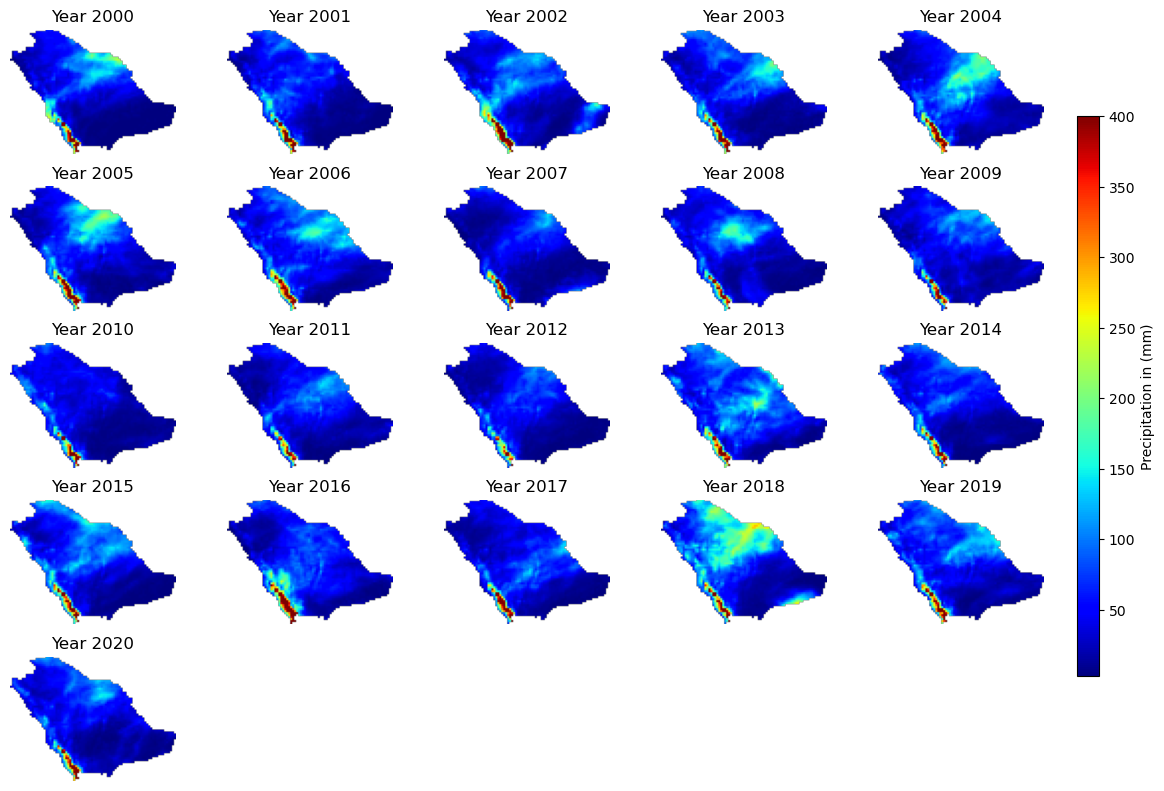

In [102]:
rows, cols = 5, 5
fig, axes = plt.subplots(rows, cols, figsize=(11, 8))
# Flatten the axes array for easy iteration
axes = axes.flatten()
# Plot each frame in the corresponding subplot
for i in range(21):
    data = list_precip_yearly[i].values[0]*1000
    data[data == 0] = np.nan
    ax = axes[i]
    im = ax.imshow(data, cmap='jet',vmax = 400)
    ax.set_title(f'Year {2000+i}')
    ax.axis('off')  # Hide axes for better visualization
axes[23].axis('off')
axes[22].axis('off')
axes[21].axis('off')
axes[24].axis('off')
# Adjust layout and add colorbar
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([1, 0.15, 0.02, 0.7])  # Colorbar position
fig.colorbar(im, cax=cbar_ax, label='Precipitation in (mm)')
plt.tight_layout()
plt.show()

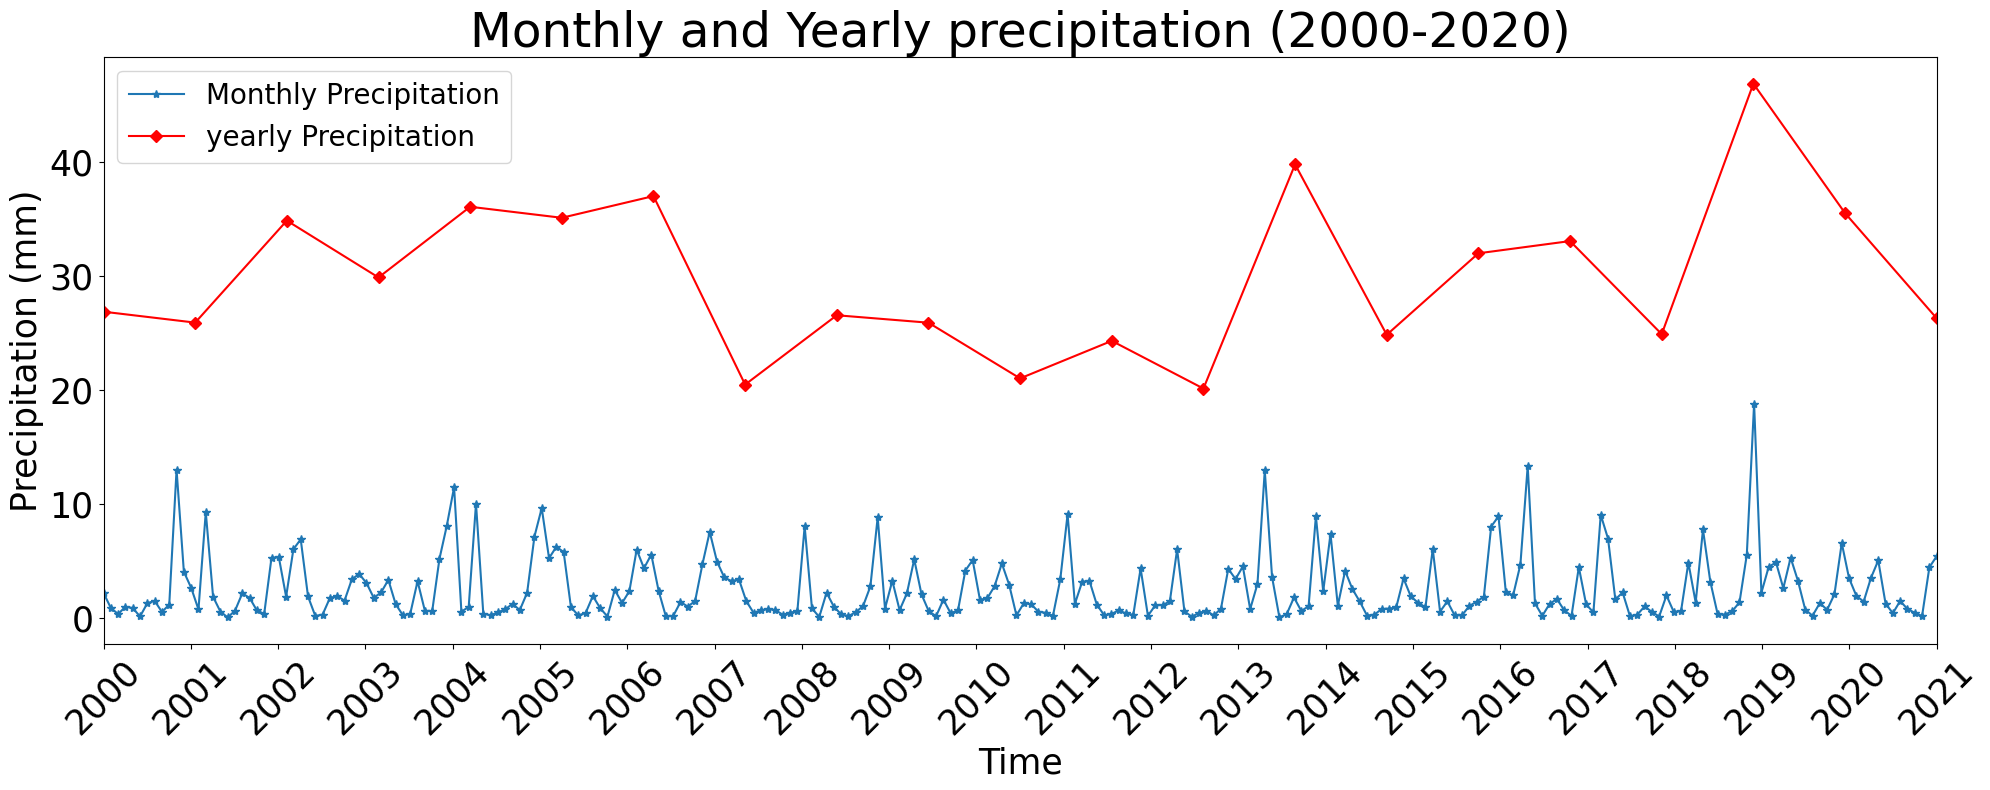

In [51]:
plt.figure(figsize = (20,8))
plt.title("Monthly and Yearly precipitation (2000-2020)",fontsize = 35)
plt.plot(np.linspace(2000,2021,252),all_years_precip_monthly,label = "Monthly Precipitation",marker = "*")
plt.plot(np.linspace(2000,2021,21),all_years_precip_yearly,label = "Yearly Precipitation",color = "red",marker = "D")
plt.xlabel("Time",fontsize = 25)
plt.xticks(np.arange(2000,2022),fontsize = 25,rotation = 45)
plt.xlim([2000,2021])
#plt.ylim([0,None])
plt.ylabel("Precipitation (mm)",fontsize = 25)
plt.yticks(fontsize = 25)
plt.legend(fontsize = 20)
plt.tight_layout()
plt.show()

$\Large \textbf{2) How does the total precipitation vary over time in Saudi Arabia across each year?}$

$\textbf{Answer:}$ From the figure above we can see the monthly variation of precipitation over Saudi Arabia from 2000 until 2020. We can see that the precipitation peaks around the $\textbf{winter season}$ which is from November until April. For the yearly variations, we notice that the highest precipitation occured during the year of 2019.

## Plotting Total Evaporation

$\Large \textbf{1) Plot total evaporation across time for the same period based on monthly sum.}$

In [110]:
all_years_evap_monthly,all_years_evap_yearly,list_evap_monthly,list_evap_yearly = get_monthly_yearly(list_evap,"e")

100%|███████████████████████████████████████████| 21/21 [01:08<00:00,  3.26s/it]


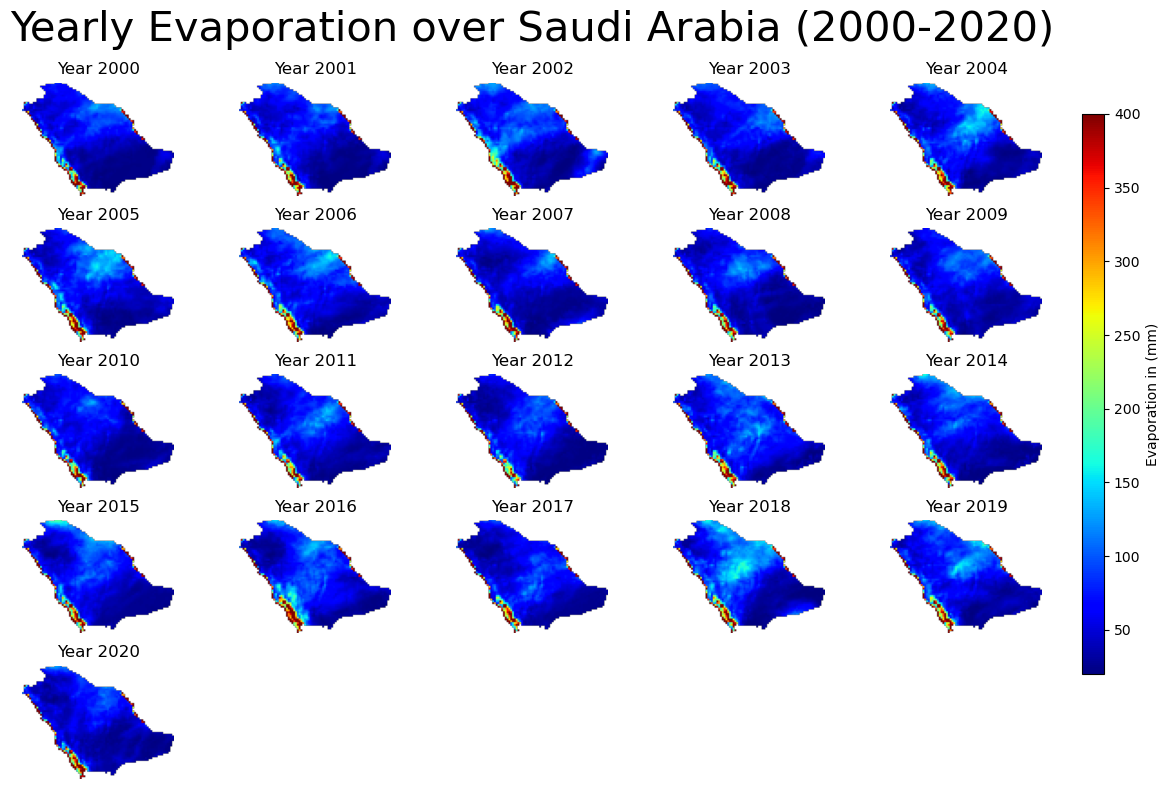

In [119]:
rows, cols = 5, 5
fig, axes = plt.subplots(rows, cols, figsize=(11, 8))
fig.suptitle("Yearly Evaporation over Saudi Arabia (2000-2020)",fontsize = 30)
# Flatten the axes array for easy iteration
axes = axes.flatten()
# Plot each frame in the corresponding subplot
for i in range(21):
    data = np.abs(list_evap_yearly[i].values[0]*1000)
    data[data == 0] = np.nan
    ax = axes[i]
    im = ax.imshow(data, cmap='jet',vmax = 400)
    ax.set_title(f'Year {2000+i}')
    ax.axis('off')  # Hide axes for better visualization
axes[23].axis('off')
axes[22].axis('off')
axes[21].axis('off')
axes[24].axis('off')
# Adjust layout and add colorbar
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([1, 0.15, 0.02, 0.7])  # Colorbar position
fig.colorbar(im, cax=cbar_ax, label='Evaporation in (mm)')
plt.tight_layout()
plt.show()

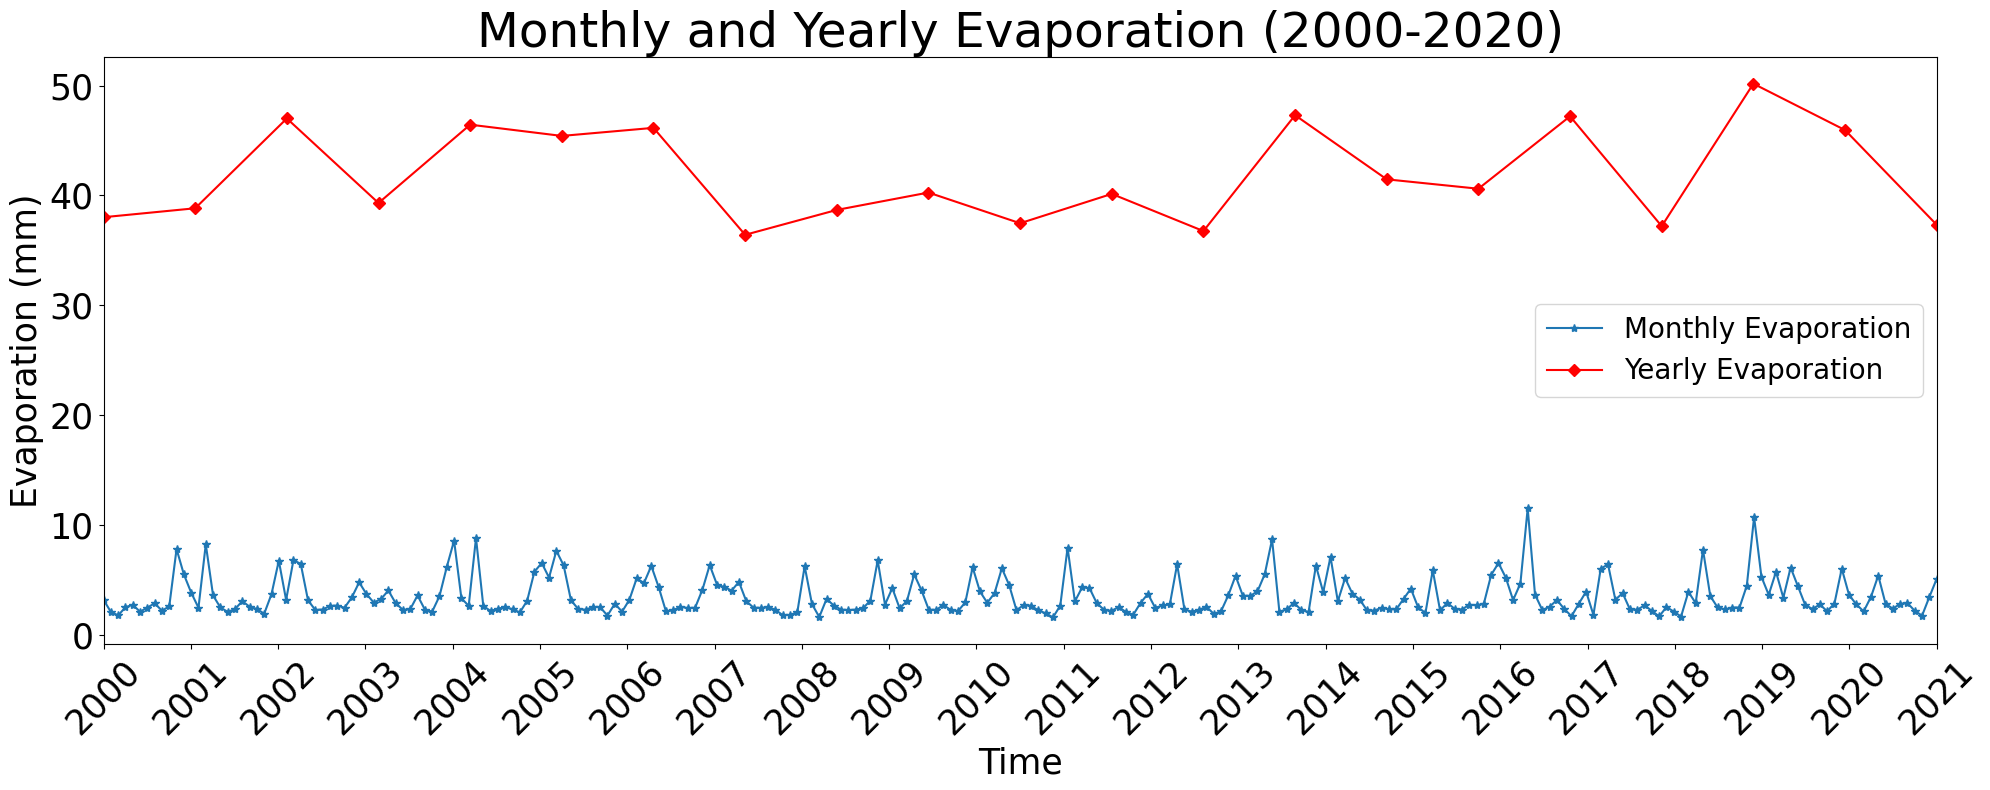

In [123]:
plt.figure(figsize = (20,8))
plt.title("Monthly and Yearly Evaporation (2000-2020)",fontsize = 35)
plt.plot(np.linspace(2000,2021,252),abs(all_years_evap_monthly),label = "Monthly Evaporation",marker = "*")
plt.plot(np.linspace(2000,2021,21),abs(all_years_evap_yearly),label = "Yearly Evaporation",color = "red",marker = "D")
plt.xlabel("Time",fontsize = 25)
plt.xticks(np.arange(2000,2022),fontsize = 25,rotation = 45)
plt.xlim([2000,2021])
#plt.ylim([0,None])
plt.ylabel("Evaporation (mm)",fontsize = 25)
plt.yticks(fontsize = 25)
plt.legend(fontsize = 20)
plt.tight_layout()
plt.show()

$\Large \textbf{2) Are there any seasonal or yearly variations in total evaporation over the years?}$

$\textbf{Answer:}$ From the figure above we can see the monthly variation of evaporation over Saudi Arabia from 2000 until 2020. We can see that the evaporation peaks around the $\textbf{winter season}$ which is from November until April. We can also see some fluctuation of evaporation during the wet season. For the yearly variations, we notice that the highest evaporation occured during the year of 2019.

$\textcolor{red}{\textbf{Note:}}$ The evaporation in the provided data has negative values, I have computed its absolute values, which explains the positive monthly and yearly evaporation values in the above plot. 

$\Large \textbf{3) How does total evaporation compare to total precipitation in the region?}$

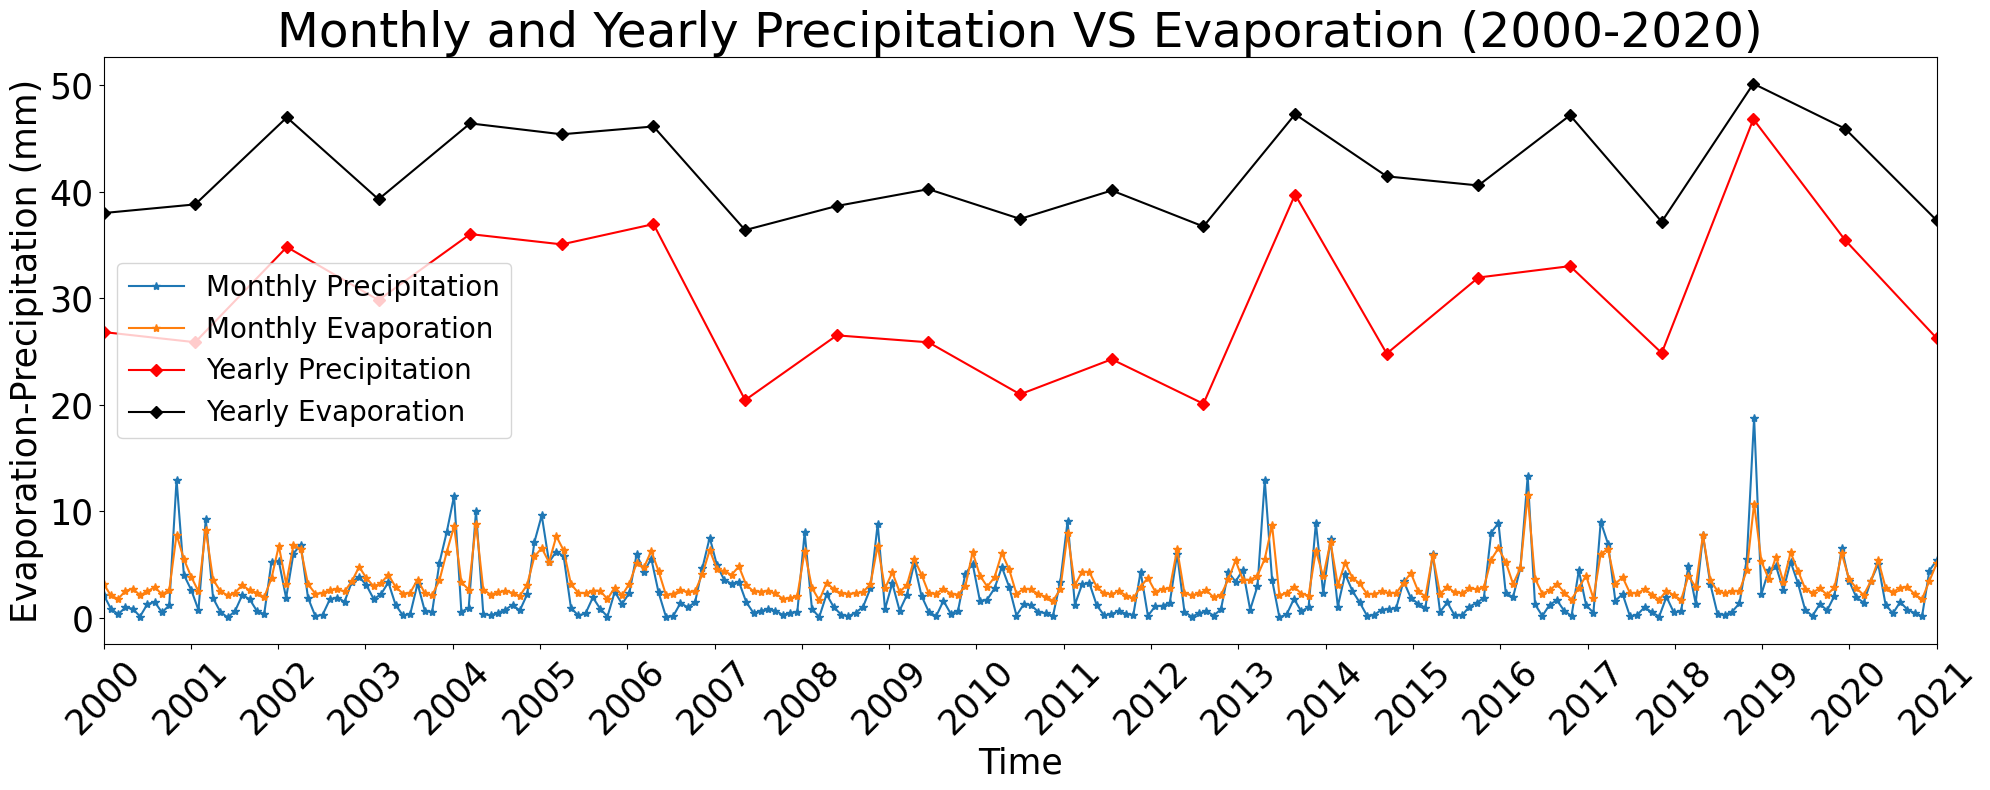

In [124]:
plt.figure(figsize = (20,8))
plt.title("Monthly and Yearly Precipitation VS Evaporation (2000-2020)",fontsize = 35)
plt.plot(np.linspace(2000,2021,252),all_years_precip_monthly,label = "Monthly Precipitation",marker = "*")
plt.plot(np.linspace(2000,2021,252),abs(all_years_evap_monthly),label = "Monthly Evaporation",marker = "*")
plt.plot(np.linspace(2000,2021,21),all_years_precip_yearly,label = "Yearly Precipitation",color = "red",marker = "D")
plt.plot(np.linspace(2000,2021,21),abs(all_years_evap_yearly),label = "Yearly Evaporation",color = "black",marker = "D")
plt.xlabel("Time",fontsize = 25)
plt.xticks(np.arange(2000,2022),fontsize = 25,rotation = 45)
plt.xlim([2000,2021])
#plt.ylim([0,None])
plt.ylabel("Evaporation-Precipitation (mm)",fontsize = 25)
plt.yticks(fontsize = 25)
plt.legend(fontsize = 20)
plt.tight_layout()
plt.show()

$\textbf{Answer:}$ The figure above show a comparison between the monthly and yearly variations for both precipitation and evaporation. We can say the monthly evaporation has a $\textbf{similar}$ trend as the monthly precipitation. Also the yearly evaporation has a $\textbf{similar}$ trend as the yearly precipitation but with overall $\textbf{higher magnitude}$

## Analyzing Runoff

$\Large \textbf{1) Use the runoff data to plot runoff over time for the selected region.}$

In [127]:
all_years_runoff_monthly,all_years_runoff_yearly,list_runoff_monthly,list_runoff_yearly = get_monthly_yearly(list_runoff,"ro")

100%|███████████████████████████████████████████| 21/21 [00:36<00:00,  1.74s/it]


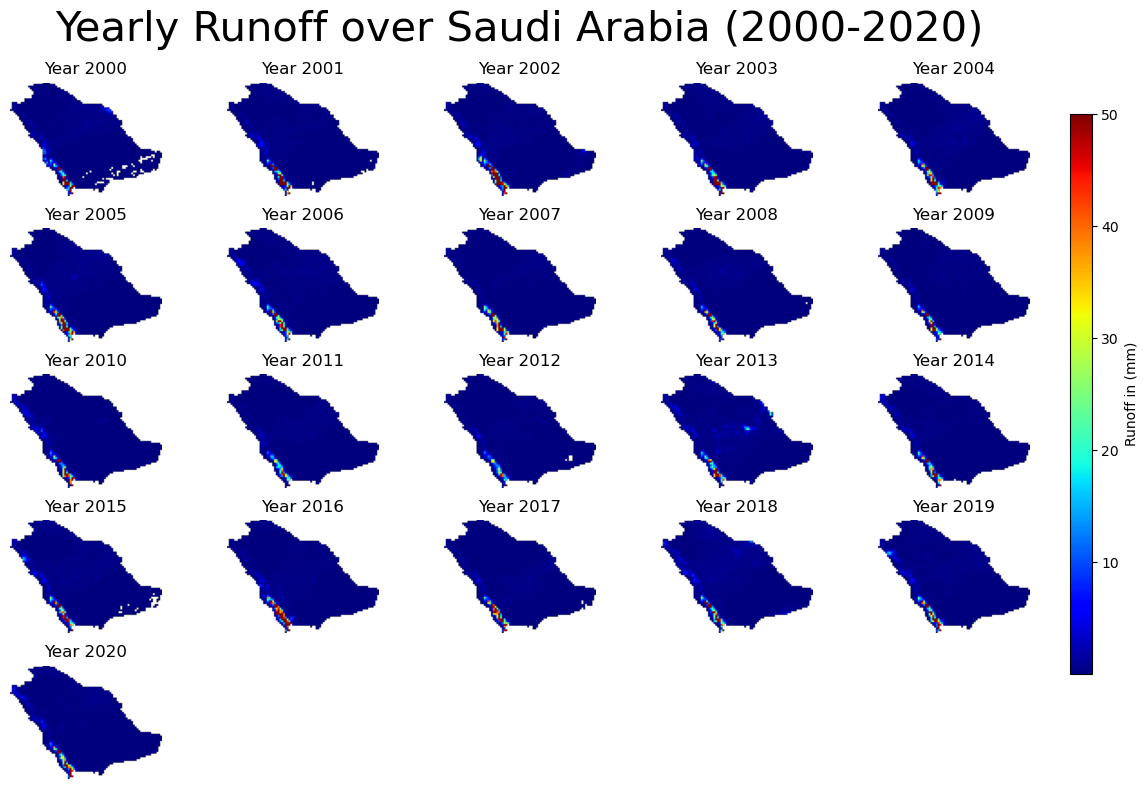

In [132]:
rows, cols = 5, 5
fig, axes = plt.subplots(rows, cols, figsize=(11, 8))
fig.suptitle("Yearly Runoff over Saudi Arabia (2000-2020)",fontsize = 30)
# Flatten the axes array for easy iteration
axes = axes.flatten()
# Plot each frame in the corresponding subplot
for i in range(21):
    data = np.abs(list_runoff_yearly[i].values[0]*1000)
    data[data == 0] = np.nan
    ax = axes[i]
    im = ax.imshow(data, cmap='jet',vmax = 50)
    ax.set_title(f'Year {2000+i}')
    ax.axis('off')  # Hide axes for better visualization
axes[23].axis('off')
axes[22].axis('off')
axes[21].axis('off')
axes[24].axis('off')
# Adjust layout and add colorbar
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([1, 0.15, 0.02, 0.7])  # Colorbar position
fig.colorbar(im, cax=cbar_ax, label='Runoff in (mm)')
plt.tight_layout()
plt.show()

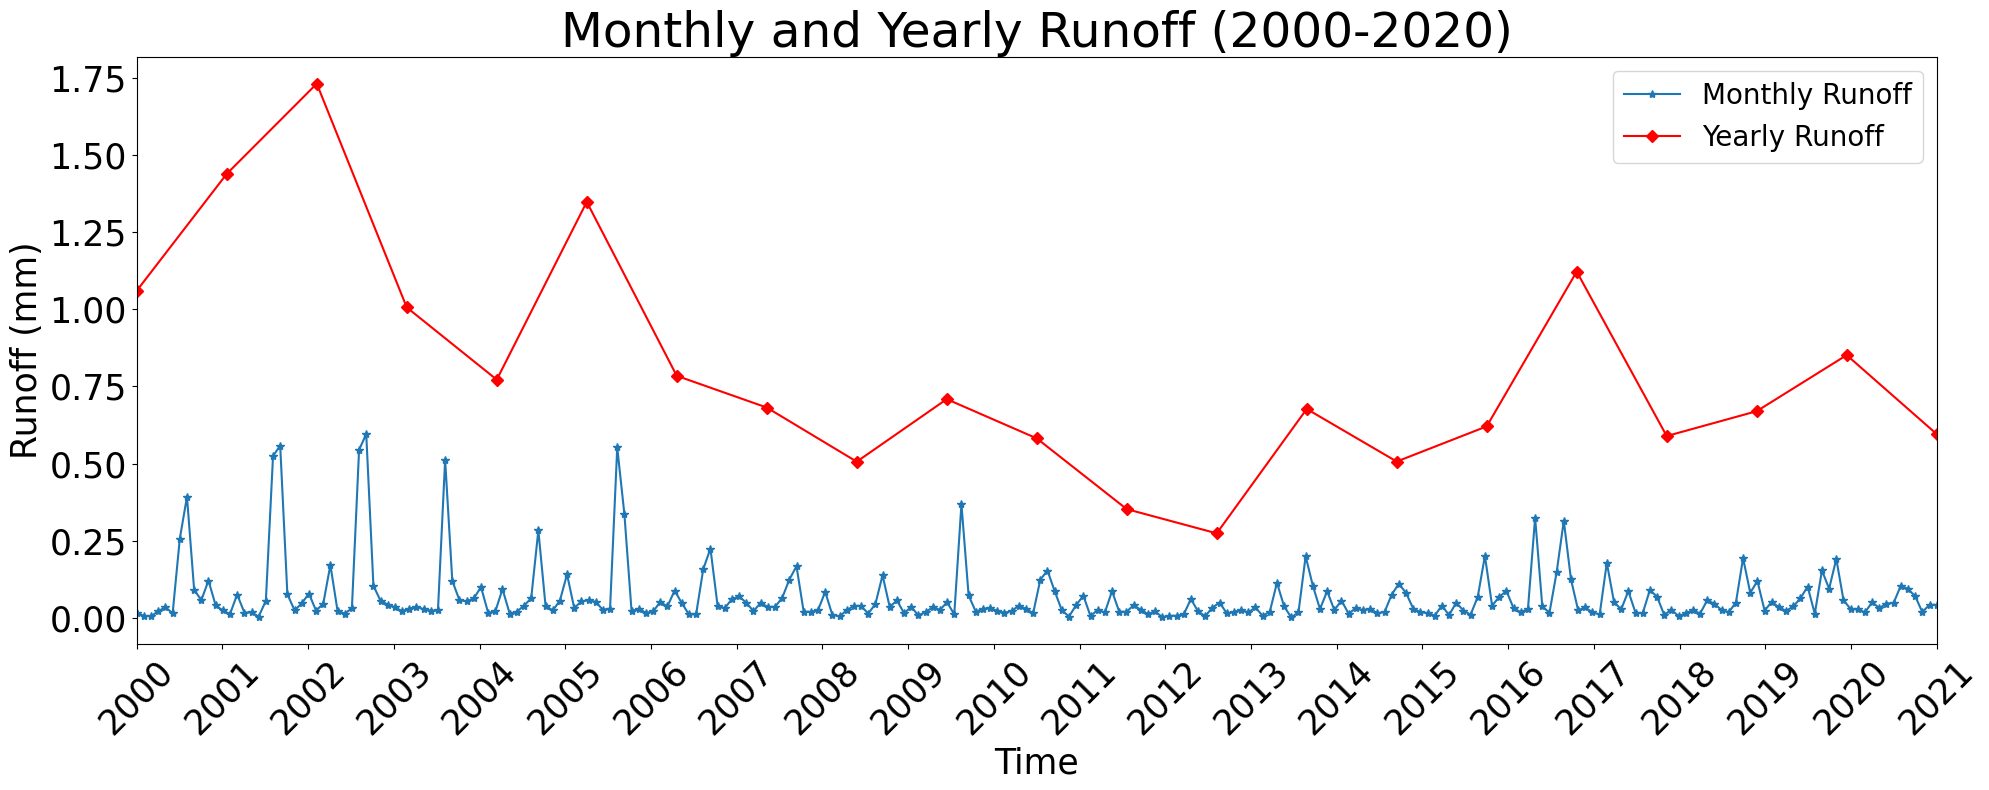

In [128]:
plt.figure(figsize = (20,8))
plt.title("Monthly and Yearly Runoff (2000-2020)",fontsize = 35)
plt.plot(np.linspace(2000,2021,252),all_years_runoff_monthly,label = "Monthly Runoff",marker = "*")
plt.plot(np.linspace(2000,2021,21),all_years_runoff_yearly,label = "Yearly Runoff",color = "red",marker = "D")
plt.xlabel("Time",fontsize = 25)
plt.xticks(np.arange(2000,2022),fontsize = 25,rotation = 45)
plt.xlim([2000,2021])
#plt.ylim([0,None])
plt.ylabel("Runoff (mm)",fontsize = 25)
plt.yticks(fontsize = 25)
plt.legend(fontsize = 20)
plt.tight_layout()
plt.show()

$\Large \textbf{2) How does the runoff data compare with the precipitation - total evaporation data?}$

In [141]:
monthly_precip_evap = all_years_precip_monthly - abs(all_years_evap_monthly)
yearly_precip_evap = all_years_precip_yearly - abs(all_years_evap_yearly)

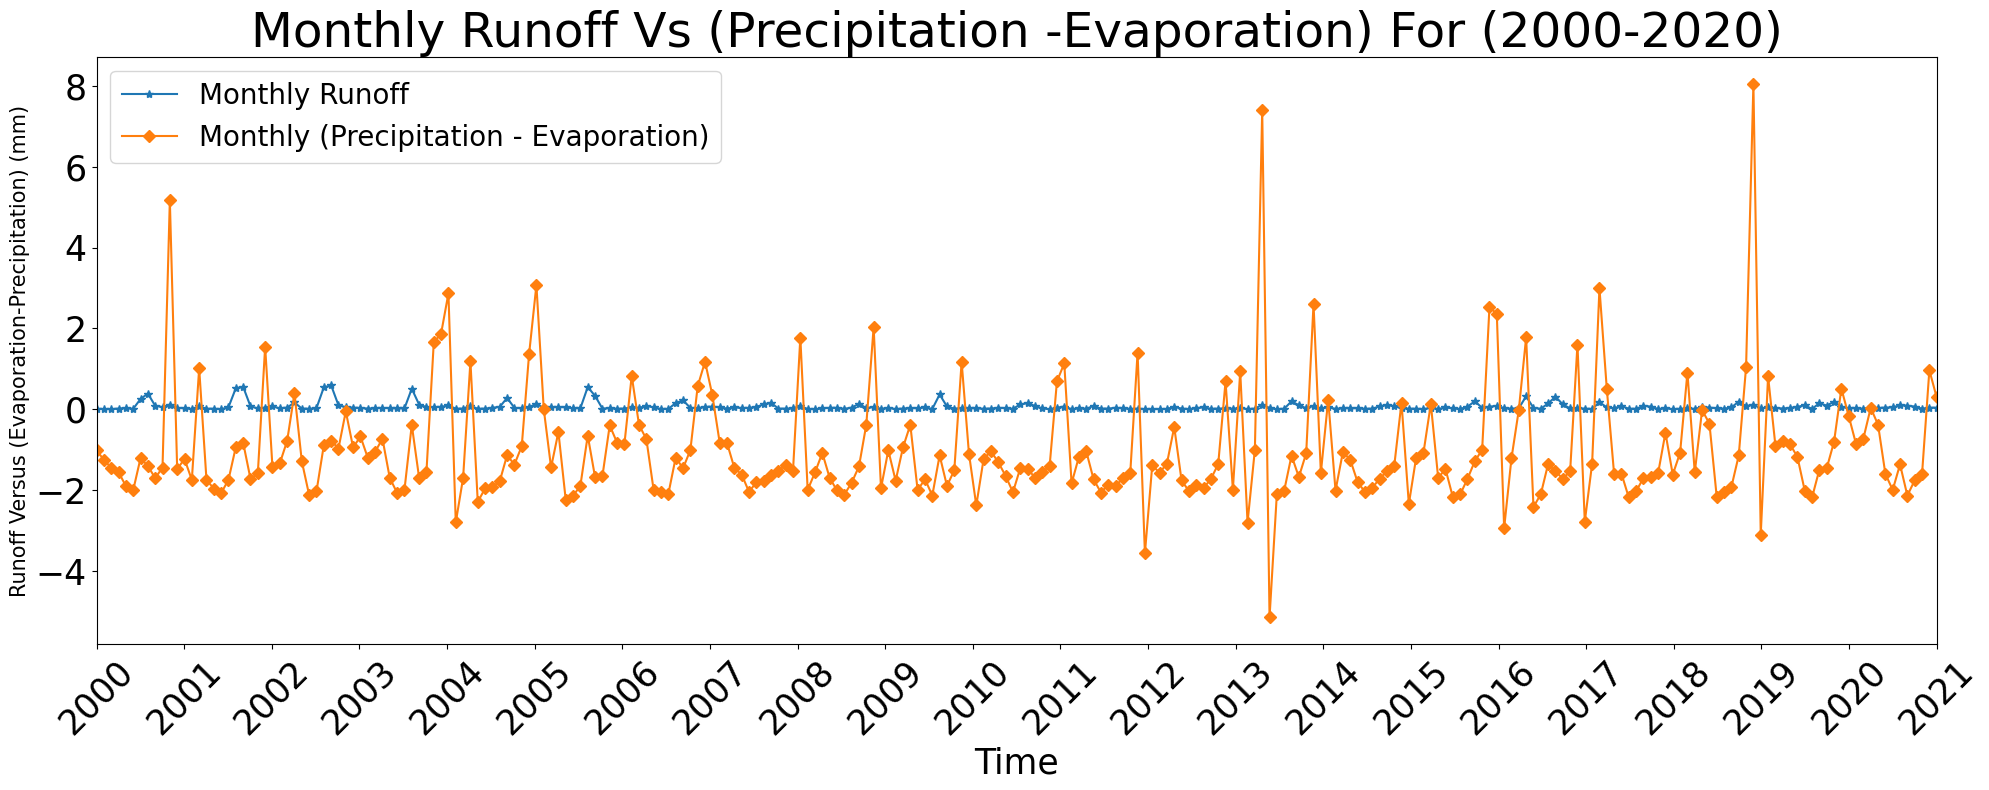

In [145]:
plt.figure(figsize = (20,8))
plt.title("Monthly Runoff Vs (Precipitation -Evaporation) For (2000-2020)",fontsize = 35)
plt.plot(np.linspace(2000,2021,252),all_years_runoff_monthly,label = "Monthly Runoff",marker = "*")
plt.plot(np.linspace(2000,2021,252),monthly_precip_evap,label = "Monthly (Precipitation - Evaporation)",marker = "D")
plt.xlabel("Time",fontsize = 25)
plt.xticks(np.arange(2000,2022),fontsize = 25,rotation = 45)
plt.xlim([2000,2021])
#plt.ylim([0,None])
plt.ylabel("Runoff Versus (Evaporation-Precipitation) (mm)",fontsize = 15)
plt.yticks(fontsize = 25)
plt.legend(fontsize = 20)
plt.tight_layout()
plt.show()

$\textbf{Answer:}$ 

The following equation represents how the precipitation, evaporation and runoff are related:

$$\underbrace{P}_{Precipitation} +\underbrace{\Delta S}_{change~in~storage} ~=~\underbrace{Q}_{Runoff} + \underbrace{E}_{Evaporation}$$

From the figure above we can see that on average the monthly runoff is $\textbf{larger}$ then (precipitation - evaporation). Yet some times the (Precipitation - evaporation) get $\textbf{larger}$ then the runoff. This difference is due to the term $\Delta S$ in the above equation which represents the change in storage. 

$\Large \textbf{3) Do you notice any significant correlations between runoff and precipitation?}$

In [150]:
print("The correlation coefficient between precipitation and runoff = ",np.corrcoef(all_years_runoff_monthly,all_years_precip_monthly)[0,1])

The correlation coefficient between precipitation and runoff =  0.12318780094083018


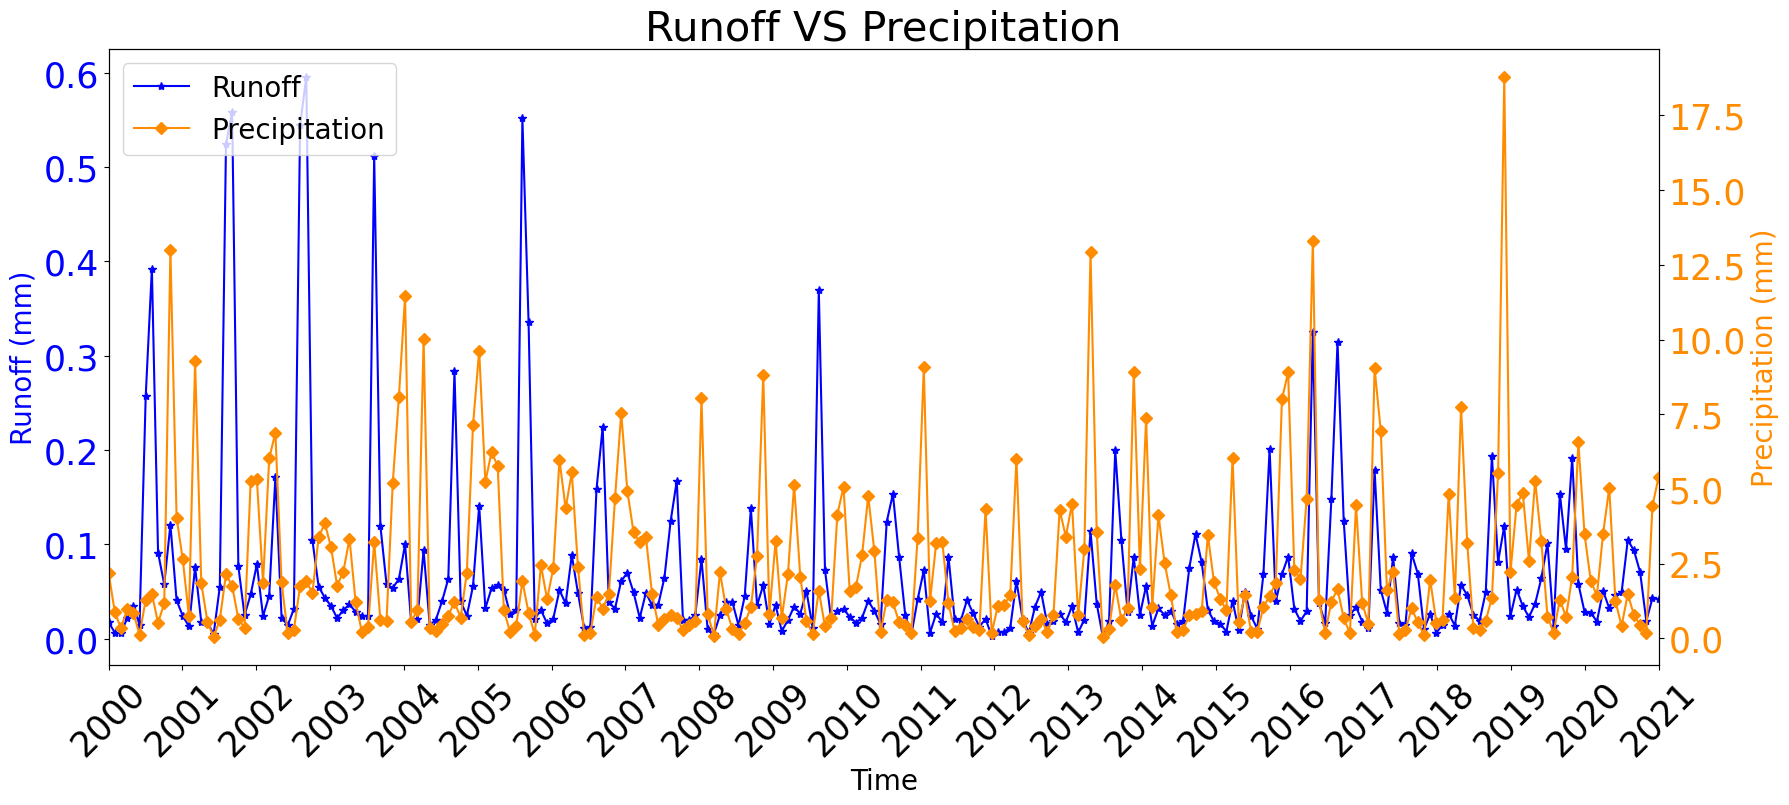

In [178]:
fig, ax1 = plt.subplots(figsize = (20,8))
# First y-axis
line1,=ax1.plot(np.linspace(2000,2021,252), all_years_runoff_monthly,color = "blue", label="Runoff",marker = "*")
ax1.set_xlabel("Time",fontsize = 20)
plt.xticks(np.arange(2000,2022),fontsize = 25,rotation = 45)
plt.xlim([2000,2021])
plt.yticks(fontsize = 25,color = "blue")
ax1.set_ylabel("Runoff (mm)", fontsize = 20,color = "blue")
plt.legend()
# Create second y-axis
ax2 = ax1.twinx()
line2,=ax2.plot(np.linspace(2000,2021,252), all_years_precip_monthly, color = "darkorange", label="Precipitation",marker = "D")
ax2.set_ylabel("Precipitation (mm)", color = "darkorange",fontsize = 20)
plt.yticks(fontsize = 25,color = "darkorange")
#plt.legend()
lines = [line1, line2]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc="upper left",fontsize = 20) 

# Show the plot
plt.title("Runoff VS Precipitation",fontsize = 30)
plt.show()


$\textbf{Answer:}$ We can see that there is a correlation between the monthly runoff and the monthly precipitation but it is $\textbf{not significant}$. Actually the $\textbf{correlation coefficient}$ is around $\textbf{0.12}$

## Comparing Precipitation and Evaporation

$\Large \textbf{1) Plot the difference of Precipitation – (Total Evaporation + Runoff)}$
$\Large \textbf{and what is the physical meaning of the difference.}$

In [179]:
monthly_evap_runoff = all_years_runoff_monthly + abs(all_years_evap_monthly)

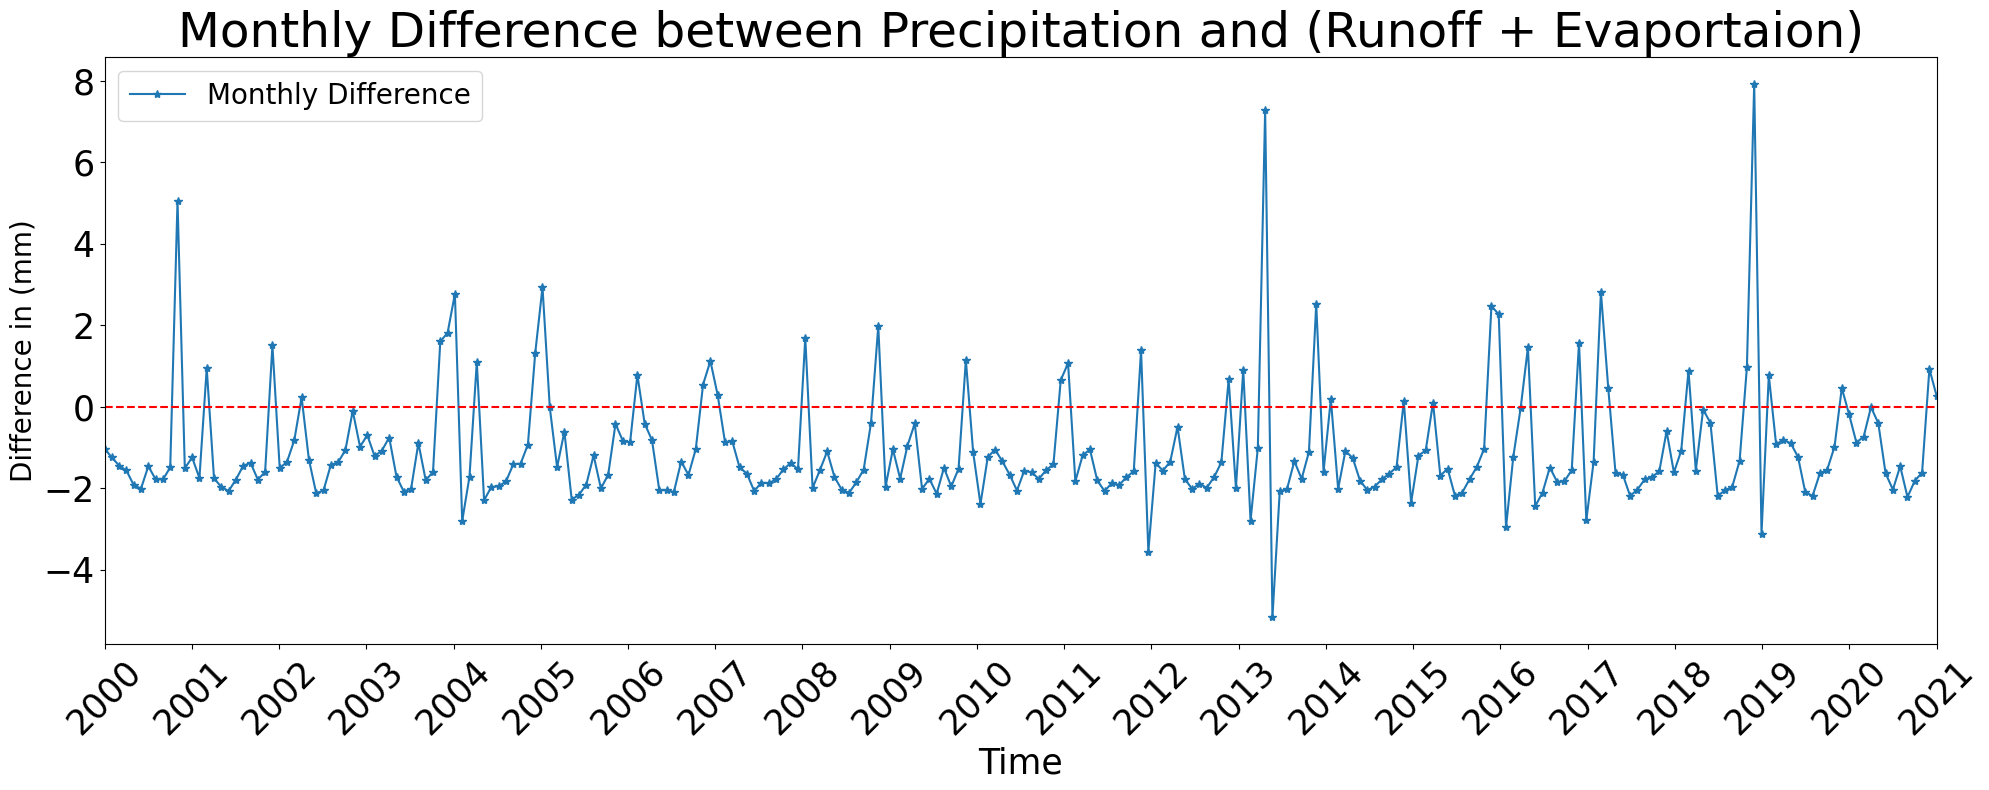

In [185]:
plt.figure(figsize = (20,8))
plt.title("Monthly Difference between Precipitation and (Runoff + Evaportaion)",fontsize = 35)
plt.plot(np.linspace(2000,2021,252),all_years_precip_monthly-monthly_evap_runoff,label = "Monthly Difference",marker = "*")
plt.xlabel("Time",fontsize = 25)
plt.xticks(np.arange(2000,2022),fontsize = 25,rotation = 45)
plt.xlim([2000,2021])
#plt.ylim([0,None])
plt.ylabel("Difference in (mm)",fontsize = 20)
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.yticks(fontsize = 25)
plt.legend(fontsize = 20)
plt.tight_layout()
plt.show()

$\textbf{Answer:}$ 

$$\underbrace{P}_{Precipitation} - (\underbrace{Q}_{Runoff} + \underbrace{E}_{Evaporation}) ~=~ \underbrace{\Delta S}_{change~in~storage}$$

The equation states that the total water input (precipitation) plus any change in storage must equal the total water output (runoff + evaporation). Which means that  the difference between precipitation and (Evaporation + Runoff) is $\textbf{the change in the storage of the ground.}$

$\Large \textbf{2) Are there any periods where precipitation exceeds Total Evaporation + Runoff}$
$\Large \textbf{(i.e., the difference is negative)?}$

$\textbf{Answer:}$ Yes, there are many periods where the precipitation exceeds the (evaporation + runoff). 


$\Large \textbf{3) What might explain the areas where Total Precipitation exceeds Total Evaporation + Runoff?}$

$\textbf{Answer:}$

From the difference between precipitation and (evaporation + runoff), we can see that the precipitation exceeds the (evaporation + runoff) during the $\textbf{winter season}$ which means that we have more rainfull with a colder weather which means less evaporation which makes P - (Q+E) positive.


# Part 3: Advanced Analysis
## Trends in the Water Balance

$\Large \textbf{1) Based on the data, can you infer any trends in the water balance using}$
$\Large \textbf{Precipitation – (Total Evaporation + Runoff)?}$

$\textbf{Answer:}$

From the data we can notice that P–(E+Q) is fluctuating with a more tendency to be $\textbf{negative}$, this means that the region of Saudi Arabi is generally $\textbf{dry}$. During the winter season where we have rainfull the change in storge ($\Delta S$) increases. while in the other seasons we have less precipitation then evaporation + runoff, which means that the change in storge ($\Delta S$) decreases.

$\Large \textbf{2) If precipitation minus (total evaporation and runoff) is not zero,}$
$\Large \textbf{where does the excess water originate or where does the deficit go?}$

$$\underbrace{P}_{Precipitation} - (\underbrace{Q}_{Runoff} + \underbrace{E}_{Evaporation}) ~=~ \underbrace{\Delta S}_{change~in~storage}$$

1) If P−(Q+E) is positive, the system is gaining water (storage is increasing). This indicates that the system is accumulating water, after heavy rainfall, water infiltrates into the soil which recharges groundwater.
2) If P−(Q+E) is negative, the system is lossing water (storage is decreasing). This indicates that the system is losing water, in other words,during a drought, precipitation is low, but evaporation and runoff continue, depleting soil moisture, groundwater, and surface water.

## Impact on Water Availability

$\Large \textbf{1) Based on the differences between precipitation, evaporation, and runoff,}$
$\Large \textbf{how might this affect the water availability in Saudi Arabia?}$

The differences between precipitation, evaporation, and runoff has a critical role in determining water availability in Saudi Arabia. Given the country's arid climate and limited freshwater resources. Saudi Arabia receives very little precipitation (average annual rainfall is less than 100 mm), in other words, limited rainfall means there is little natural replenishment of surface water. Furthermore, due to the hot and arid climate, evaporation rates in Saudi Arabia are high, often exceeding precipitation, which means that water stored in surface reservoirs or soil is quickly lost to evaporation, which reduces the amount of water available for use. Moreover, Runoff is very limited in Saudi Arabia due to low precipitation, high evaporation, and the absence of permanent rivers, in other words, limited runoff means there is little surface water to collect or store in reservoirs.

$\Large \textbf{2) How could these findings be useful for water management strategies in the region?}$

These findings underscore the urgent need for sustainable water management in Saudi Arabia, including measures like enhancing water efficiency, increasing desalination and wastewater recycling, and carefully managing groundwater resources. By recognizing the challenges posed by low rainfall, high evaporation, and limited runoff, decision-makers can focus on conserving water, investing in innovative solutions like rainwater harvesting and cloud seeding, and supporting climate-resilient farming practices. These steps are essential to tackling water scarcity and securing a stable water supply for the future.